<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/burn_severity/PostFire_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAR & NDVI Regeneration Post-Fire**

*Post-Fire comparison of NDVI and SAR*


Google Earth Engine code of NDVI time series in SAR burn severity classes:

https://code.earthengine.google.com/718ef671127dfab9a40b75590a1fa855

* can print time series, but times out with too much data
* can instead export to Google Drive a csv of the time series
* currently these are assets on GEE, that can be used for the time series.
  * UAVSAR severity classes: projects/wetlands-366023/assets/uavsar_severity
  * UAVSAR & dNBR agreement classes: uavsar_dnbr_agreement
  * UAVSAR & dNBR disagreement classes: disagree_sar_dnbr
  * BAER severity classes: projects/wetlands-366023/assets/BAER_severity
  * MTBS severity classes: projects/wetlands-366023/assets/MTBS_severity


To Do:
- label classes
- CalVeg

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
columns_to_read = ['NDVI', 'STDEV', 'NBR', 'NBR_STDEV', 'VALUE', 'date']

# CSV file path in Google Drive
baer_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/csvs/monthly_ndvi_nbr_composite_baer_severity_classes.csv'
baer_df = pd.read_csv(baer_path, usecols=columns_to_read)

mtbs_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/csvs/monthly_ndvi_nbr_composite_mtbs_severity_classes.csv'
mtbs_df = pd.read_csv(mtbs_path, usecols=columns_to_read)

uavsar_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/csvs/monthly_ndvi_nbr_composite_uavsar_severity_classes.csv'
uavsar_df = pd.read_csv(uavsar_path, usecols=columns_to_read)

dnbr_uavsar_agree_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/csvs/monthly_ndvi_nbr_composite_uavsar_dnbr_agree.csv'
dnbr_uavsar_agree_df = pd.read_csv(dnbr_uavsar_agree_path, usecols=columns_to_read)

dnbr_uavsar_disagree_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/csvs/monthly_ndvi_nbr_composite_uavsar_dnbr_disagree.csv'
dnbr_uavsar_disagree_df = pd.read_csv(dnbr_uavsar_disagree_path, usecols=columns_to_read)

calveg_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/csvs/monthly_ndvi_nbr_composite_calveg.csv'
calveg_df = pd.read_csv(calveg_path, usecols=columns_to_read)

dnbr_uavsar_disagree_df

,NDVI,STDEV,NBR,NBR_STDEV,VALUE,date
0,0.248268,0.108478,0.279349,0.138748,10.0,2016-01-01T00:00:00
1,0.197277,0.119979,0.120979,0.170604,60.0,2016-01-01T00:00:00
2,0.204964,0.144266,0.316390,0.143733,40.0,2016-01-01T00:00:00
3,0.228583,0.096290,0.068479,0.137748,30.0,2016-01-01T00:00:00
4,0.362248,0.061798,0.287123,0.102109,10.0,2016-02-01T00:00:00
...,...,...,...,...,...,...
375,0.182622,0.045790,0.104454,0.054370,30.0,2023-11-23T00:00:00
376,0.131912,0.064064,0.143625,0.057187,10.0,2023-12-24T00:00:00
377,0.166036,0.086976,0.119123,0.075957,60.0,2023-12-24T00:00:00
378,0.104445,0.076055,0.138598,0.057546,40.0,2023-12-24T00:00:00


In [24]:
a = calveg_df['VALUE'].unique()
a

array(['SUMAC SHRUB ALLIANCE', 'URBAN-RELATED BARE SOIL',
       'ANNUAL GRASSES AND FORBS ALLIANCE',
       'LOWER MONTANE MIXED CHAPARRAL ALLIANCE', 'EUCALYPTUS ALLIANCE',
       'SOFT SCRUB - MIXED CHAPARRAL ALLIANCE',
       'CEANOTHUS CHAPARRAL ALLIANCE', 'SCRUB OAK ALLIANCE',
       'CALIFORNIA BAY ALLIANCE', 'BUCKWHEAT ALLIANCE',
       'CALIFORNIA SAGEBRUSH ALLIANCE', 'BIGCONE DOUGLAS-FIR ALLIANCE',
       'COASTAL MIXED HARDWOOD ALLIANCE', 'COAST LIVE OAK ALLIANCE',
       'Barren'], dtype=object)

## Sentinel-2 Time Series

In [44]:
# from matplotlib import colormaps
# list(colormaps)

In [111]:
import ee
import geemap

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='wetlands-366023')

In [155]:
# Define the two polygon assets
asset1 = ee.FeatureCollection('projects/wetlands-366023/assets/uavsar_severity')
asset2 = ee.FeatureCollection('projects/wetlands-366023/assets/calveg_verdugos')
asset3 = ee.FeatureCollection('projects/wetlands-366023/assets/disagree_sar_dnbr')
asset4 = ee.FeatureCollection('projects/wetlands-366023/assets/disagree_sar_dnbr')

# Export the asset as GeoJSON
output_path = 'uavsar_severity.geojson'  # Change this to your desired output path
geemap.ee_export_vector(asset1, filename=output_path)

output_path2 = 'calveg_verdugos.geojson'
geemap.ee_export_vector(asset2, filename=output_path2)

output_path3 = 'disagree_sar_dnbr.geojson'
geemap.ee_export_vector(asset3, filename=output_path3)

output_path4 = 'disagree_sar_dnbr.geojson'
geemap.ee_export_vector(asset4, filename=output_path4)

Generating URL ...
Please wait ...
Data downloaded to /content/uavsar_severity.geojson
Generating URL ...
Please wait ...
Data downloaded to /content/calveg_verdugos.geojson
Generating URL ...
Please wait ...
Data downloaded to /content/disagree_sar_dnbr.geojson
Generating URL ...
Please wait ...
Data downloaded to /content/disagree_sar_dnbr.geojson


## UAVSAR-classes and Calveg overlap

In [148]:
# Read the GeoJSON files into GeoDataFrames
geojson1 = 'uavsar_severity.geojson'
geojson2 = 'calveg_verdugos.geojson'

gdf1 = gpd.read_file(geojson1)
gdf2 = gpd.read_file(geojson2)

# Reproject geometries to a projected CRS
gdf1 = gdf1.to_crs('EPSG:3395')  # Choose an appropriate projected CRS
gdf2 = gdf2.to_crs('EPSG:3395')  # Choose the same CRS as gdf1

# Perform a spatial join to find overlapping geometries
intersected = gpd.overlay(gdf1, gdf2, how='intersection', keep_geom_type=False)

# Calculate the area of overlap for each attribute combination
intersected['overlap_area'] = intersected.geometry.area

# Calculate the total area of each attribute in gdf1
total_area_gdf1 = gdf1.groupby('VALUE')['geometry'].apply(lambda x: x.unary_union.area).reset_index()

# Calculate the percentage of overlap for each attribute combination
result = intersected.groupby(['VALUE', 'REG_DOMINA'])['overlap_area'].sum().reset_index()
total_area = result['overlap_area'].sum()

area_per_class = result.groupby('VALUE').sum()['overlap_area']
result = result.merge(area_per_class, left_on='VALUE', right_on='VALUE')
result['percentage_overlap'] = (result['overlap_area_x'] / result['overlap_area_y']) * 100

result

,VALUE,REG_DOMINA,overlap_area_x,overlap_area_y,percentage_overlap,total_percentage
0,10.0,ANNUAL GRASSES AND FORBS ALLIANCE,1.672652e+05,1.112024e+07,1.504152,0.353121
1,10.0,BUCKWHEAT ALLIANCE,2.018948e+04,1.112024e+07,0.181556,0.042623
2,10.0,Barren,1.327461e+05,1.112024e+07,1.193734,0.280246
3,10.0,CALIFORNIA SAGEBRUSH ALLIANCE,1.384576e+06,1.112024e+07,12.450958,2.923038
4,10.0,CEANOTHUS CHAPARRAL ALLIANCE,1.981207e+05,1.112024e+07,1.781623,0.418261
5,10.0,COAST LIVE OAK ALLIANCE,1.284816e+05,1.112024e+07,1.155386,0.271243
6,10.0,COASTAL MIXED HARDWOOD ALLIANCE,3.294566e+05,1.112024e+07,2.962676,0.695530
7,10.0,LOWER MONTANE MIXED CHAPARRAL ALLIANCE,1.997316e+06,1.112024e+07,17.961089,4.216619
8,10.0,SCRUB OAK ALLIANCE,1.817628e+05,1.112024e+07,1.634522,0.383727
9,10.0,SOFT SCRUB - MIXED CHAPARRAL ALLIANCE,5.380559e+05,1.112024e+07,4.838528,1.135913


Could add percentage within the fire perimeter

In [151]:
each_veg_area = result.groupby('REG_DOMINA')

In [147]:
# Group by VALUE and REG_DOMINA, then sum the overlap_area
df = result
grouped = df.groupby(['VALUE', 'REG_DOMINA'])['percentage_overlap'].sum().unstack()
grouped

REG_DOMINA,ANNUAL GRASSES AND FORBS ALLIANCE,BUCKWHEAT ALLIANCE,Barren,CALIFORNIA SAGEBRUSH ALLIANCE,CEANOTHUS CHAPARRAL ALLIANCE,COAST LIVE OAK ALLIANCE,COASTAL MIXED HARDWOOD ALLIANCE,LOWER MONTANE MIXED CHAPARRAL ALLIANCE,SCRUB OAK ALLIANCE,SOFT SCRUB - MIXED CHAPARRAL ALLIANCE,SUMAC SHRUB ALLIANCE,URBAN-RELATED BARE SOIL
VALUE,,,,,,,,,,,,
10.0,1.504152,0.181556,1.193734,12.450958,1.781623,1.155386,2.962676,17.961089,1.634522,4.838528,52.488012,1.847764
20.0,0.204130,0.003971,0.170282,24.221988,1.279152,0.254597,1.270601,24.672792,1.143434,4.503232,41.322160,0.953661
30.0,0.019771,NaN,0.002229,30.589817,0.485955,0.012233,0.083589,29.932315,0.477884,2.313621,35.756127,0.326460


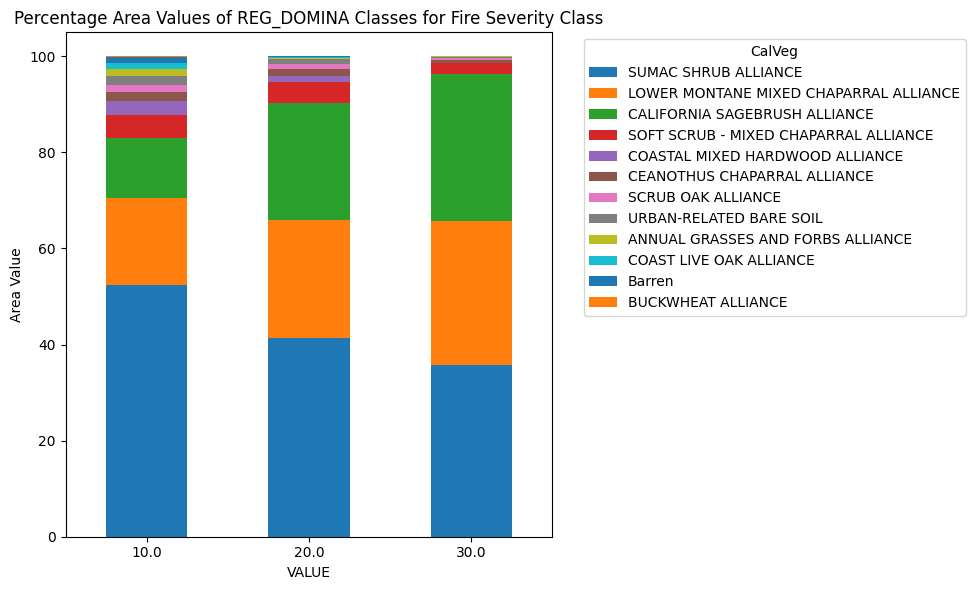

In [154]:
# Group by VALUE and REG_DOMINA, then sum the percentage_overlap
grouped = df.groupby(['VALUE', 'REG_DOMINA'])['percentage_overlap'].sum().unstack()

# Calculate the sum of percentage_overlap within each REG_DOMINA
sums_by_reg_domina = grouped.sum(axis=0)

# Sort the REG_DOMINA categories based on the sums
sorted_reg_domina = sums_by_reg_domina.sort_values(ascending=False).index

# Reindex the DataFrame based on the sorted REG_DOMINA categories
grouped_sorted = grouped[sorted_reg_domina]

# Plotting
ax = grouped_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Percentage Area Values of REG_DOMINA Classes for Fire Severity Class')
plt.xlabel('VALUE')
plt.ylabel('Area Value')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
# bigger legend - put outside plot
plt.legend(title='CalVeg', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Read the GeoJSON files into GeoDataFrames
geojson1 = 'disagree_sar_dnbr.geojson'
geojson2 = 'calveg_verdugos.geojson'

gdf1 = gpd.read_file(geojson1)
gdf2 = gpd.read_file(geojson2)

# Reproject geometries to a projected CRS
gdf1 = gdf1.to_crs('EPSG:3395')  # Choose an appropriate projected CRS
gdf2 = gdf2.to_crs('EPSG:3395')  # Choose the same CRS as gdf1

# Perform a spatial join to find overlapping geometries
intersected = gpd.overlay(gdf1, gdf2, how='intersection', keep_geom_type=False)

# Calculate the area of overlap for each attribute combination
intersected['overlap_area'] = intersected.geometry.area

# Calculate the total area of each attribute in gdf1
total_area_gdf1 = gdf1.groupby('VALUE')['geometry'].apply(lambda x: x.unary_union.area).reset_index()

# Calculate the percentage of overlap for each attribute combination
result = intersected.groupby(['VALUE', 'REG_DOMINA'])['overlap_area'].sum().reset_index()
total_area = result['overlap_area'].sum()

area_per_class = result.groupby('VALUE').sum()['overlap_area']
result = result.merge(area_per_class, left_on='VALUE', right_on='VALUE')
result['percentage_overlap'] = (result['overlap_area_x'] / result['overlap_area_y']) * 100

result

In [ ]:
# Group by VALUE and REG_DOMINA, then sum the overlap_area
df = result
grouped = df.groupby(['VALUE', 'REG_DOMINA'])['percentage_overlap'].sum().unstack()
grouped

In [ ]:
# Group by VALUE and REG_DOMINA, then sum the percentage_overlap
grouped = df.groupby(['VALUE', 'REG_DOMINA'])['percentage_overlap'].sum().unstack()

# Calculate the sum of percentage_overlap within each REG_DOMINA
sums_by_reg_domina = grouped.sum(axis=0)

# Sort the REG_DOMINA categories based on the sums
sorted_reg_domina = sums_by_reg_domina.sort_values(ascending=False).index

# Reindex the DataFrame based on the sorted REG_DOMINA categories
grouped_sorted = grouped[sorted_reg_domina]

# Plotting
ax = grouped_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Percentage Area Values of REG_DOMINA Classes for Fire Severity Class')
plt.xlabel('VALUE')
plt.ylabel('Area Value')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
# bigger legend - put outside plot
plt.legend(title='CalVeg', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

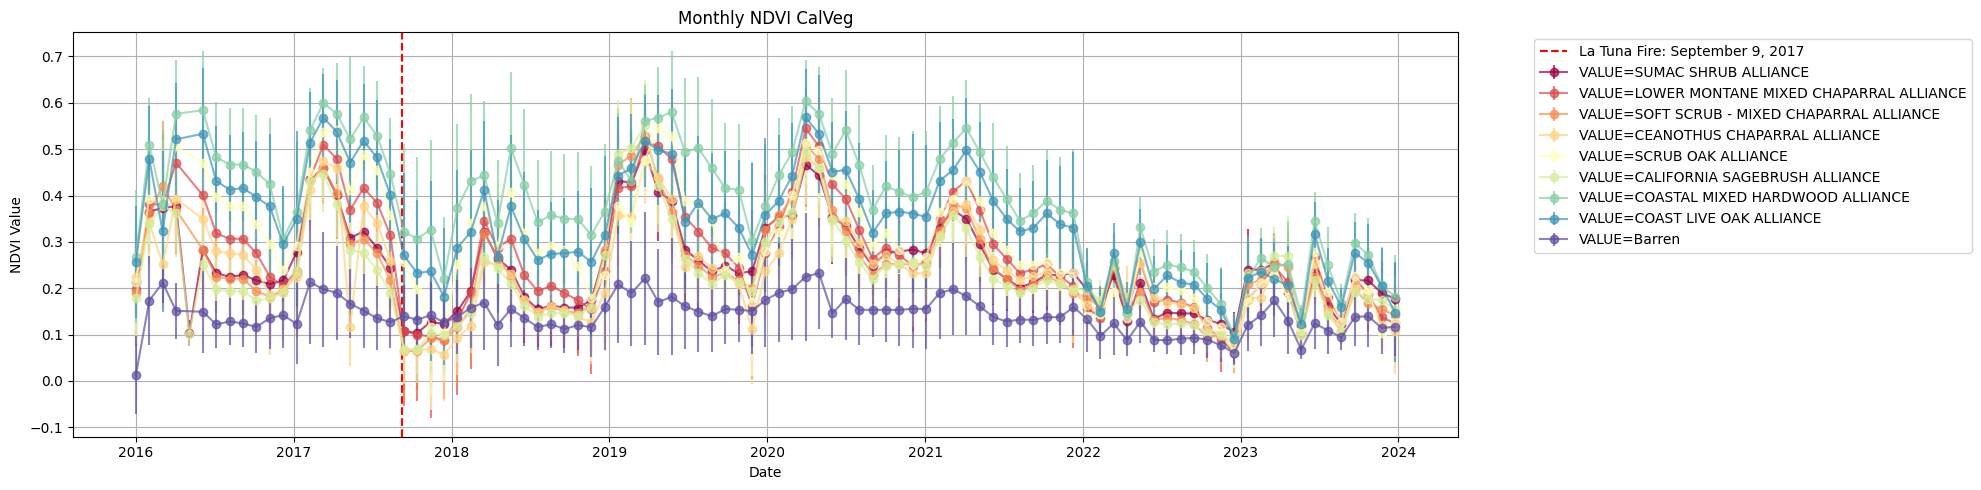

In [30]:
#@title Calveg (all of Verdugos - not just burned. Veg composition may be changed post-fire)
df = calveg_df

# drop calveg classses that cover smaller areas (to make chart less busy)
df = df[df['VALUE'] != 'CALIFORNIA BAY ALLIANCE']
df = df[df['VALUE'] != 'BUCKWHEAT ALLIANCE']
df = df[df['VALUE'] != 'BIGCONE DOUGLAS-FIR ALLIANCE']
df = df[df['VALUE'] != 'EUCALYPTUS ALLIANCE']
df = df[df['VALUE'] != 'URBAN-RELATED BARE SOIL']
df = df[df['VALUE'] != 'ANNUAL GRASSES AND FORBS ALLIANCE']

df['date'] = pd.to_datetime(df['date'])


df['VALUE'] = df['VALUE']#.map(value_labels)

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')

for value, color in zip(unique_values, colors):
    df_value = df[df['VALUE'] == value]

    # check that df values are finite
    df_value = df_value[np.isfinite(df_value['NDVI']) & np.isfinite(df_value['STDEV'])]
    # check if df is not empty (getting error)
    if not df_value.empty:
        # Plot NDVI values with error bars
        plt.errorbar(df_value['date'], df_value['NDVI'], yerr=df_value['STDEV'], fmt='o', linestyle='-', alpha=0.7, color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI CalVeg')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()

# bigger legend - put outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## NDVI Time Series

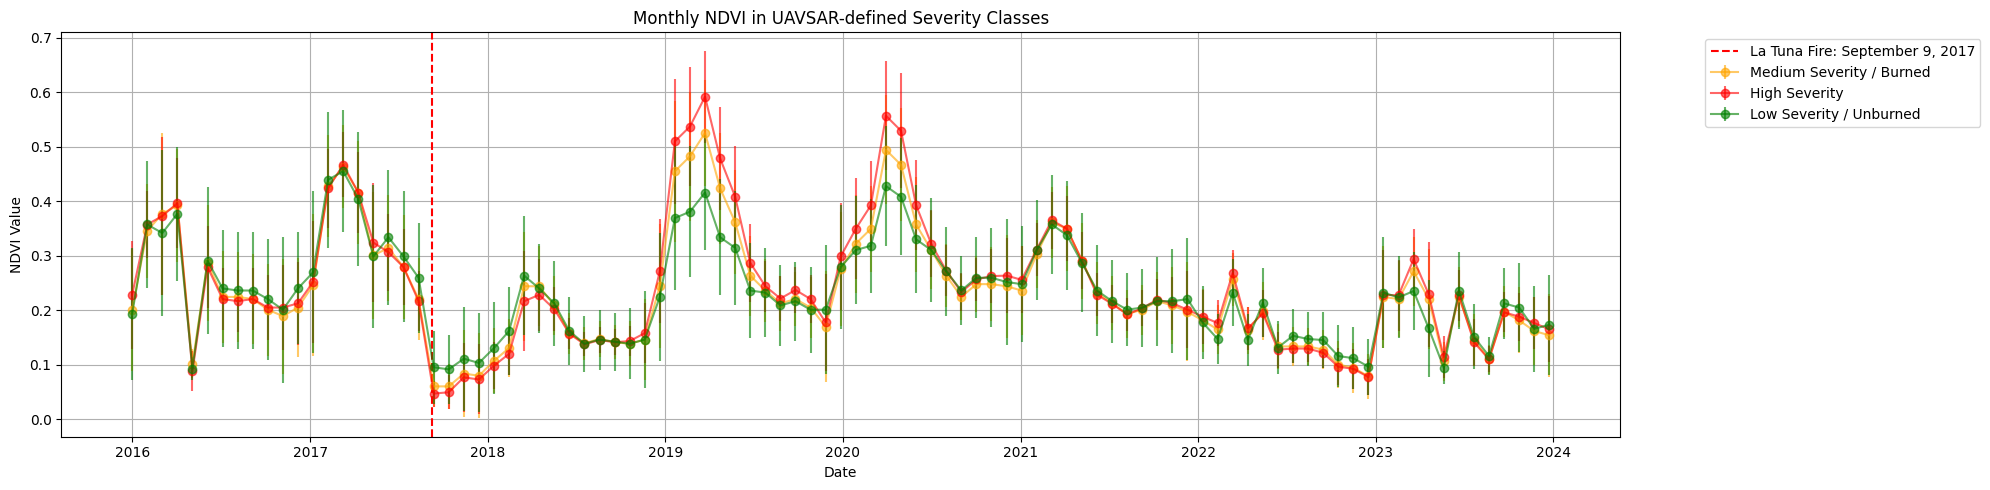

In [90]:
#@title Monthly NDVI (UAVSAR-defined Severity Classes)

df = uavsar_df.copy()

df['date'] = pd.to_datetime(df['date'])

# define value labels
value_labels = {
    10: 'Low Severity / Unburned',
    20: 'Medium Severity / Burned',
    30: 'High Severity'
}

# map the 'VALUE' column to its labels
df['VALUE'] = df['VALUE'].map(value_labels)

# get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# define specific colors for the unique values
color_map = {
    'Low Severity / Unburned': 'green',
    'Medium Severity / Burned': 'orange',
    'High Severity': 'red'
}

# plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')

for value in unique_values:
    df_value = df[df['VALUE'] == value]

    # filter out non-finite values (was getting an error for nan)
    df_value = df_value[np.isfinite(df_value['NDVI']) & np.isfinite(df_value['STDEV'])]

    if not df_value.empty:
        color = color_map.get(value)

        # Plot NDVI values with error bars
        plt.errorbar(df_value['date'], df_value['NDVI'], yerr=df_value['STDEV'], fmt='o', linestyle='-', alpha=0.6, color=color, label=value)

plt.title('Monthly NDVI in UAVSAR-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)

# place the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

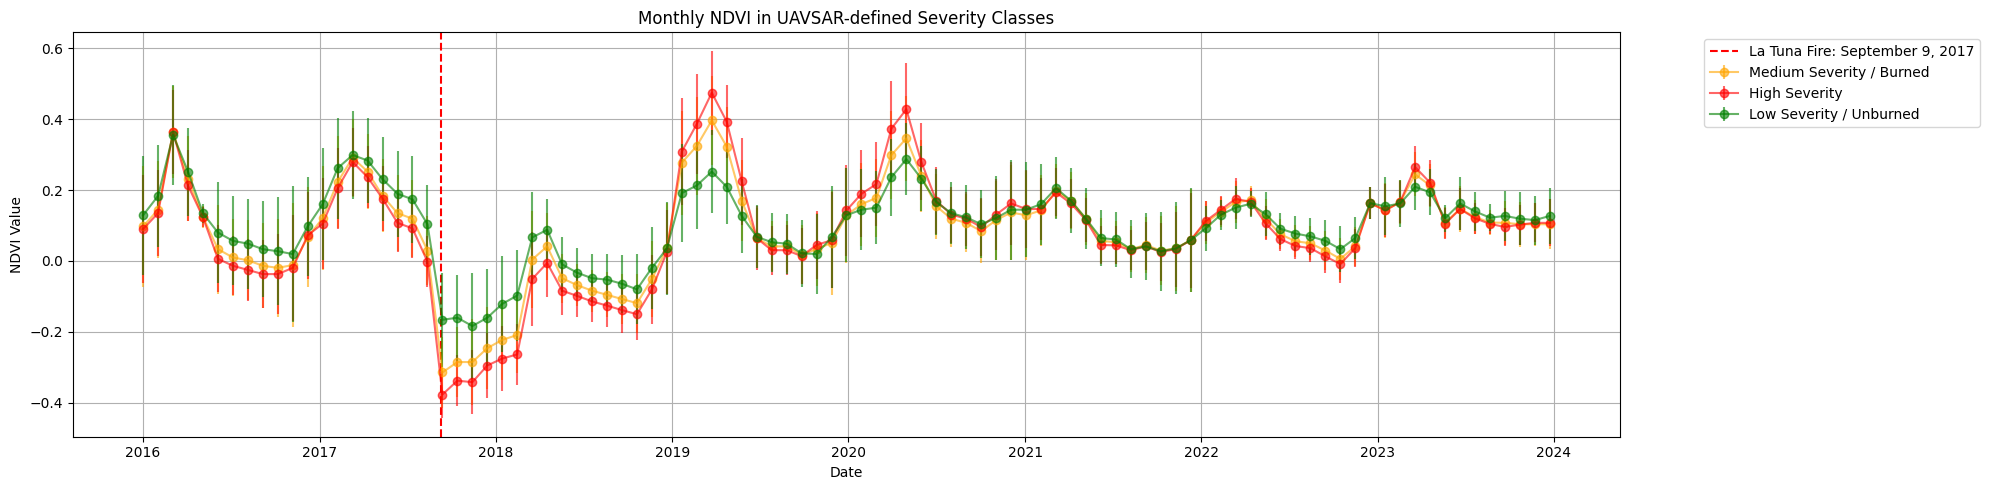

In [80]:
#@title Monthly NBR (UAVSAR-defined Severity Classes)
df = uavsar_df.copy()

df['date'] = pd.to_datetime(df['date'])

value_labels = {
    10: 'Low Severity / Unburned',
    20: 'Medium Severity / Burned',
    30: 'High Severity'
}

df['VALUE'] = df['VALUE'].map(value_labels)

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# define specific colors for the unique values
color_map = {
    'Low Severity / Unburned': 'green',
    'Medium Severity / Burned': 'orange',
    'High Severity': 'red'
}

# Plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')


for value in unique_values:
    df_value = df[df['VALUE'] == value]

    # filter out non-finite values (was getting an error for nan)
    df_value = df_value[np.isfinite(df_value['NBR']) & np.isfinite(df_value['NBR_STDEV'])]

    if not df_value.empty:
        color = color_map.get(value)

        # Plot NDVI values with error bars
        plt.errorbar(df_value['date'], df_value['NBR'], yerr=df_value['NBR_STDEV'], fmt='o', linestyle='-', alpha=0.6, color=color, label=value)

plt.title('Monthly NDVI in UAVSAR-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)

# place the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

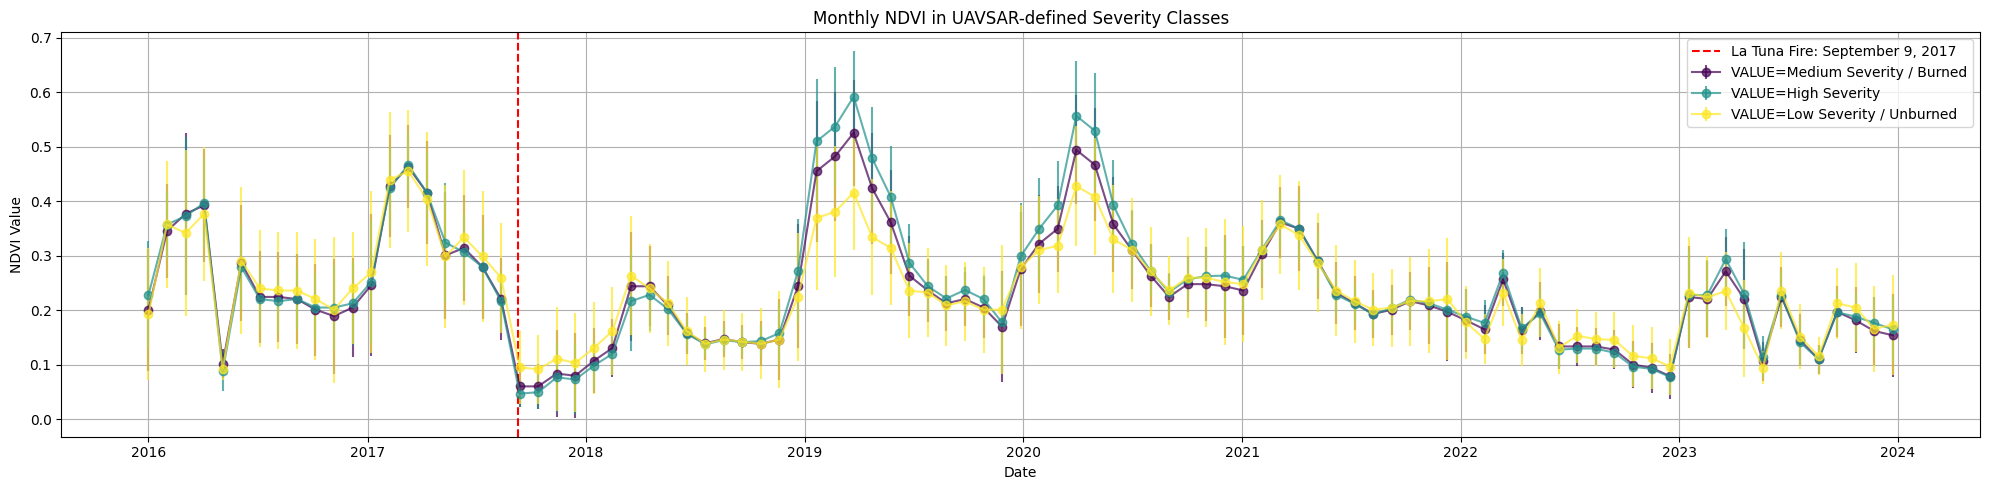

In [94]:
#@title Monthly NDVI (UAVSAR-defined Severity Classes)
df = uavsar_df

df['date'] = pd.to_datetime(df['date'])

value_labels = {
    10: 'Low Severity / Unburned',
    20: 'Medium Severity / Burned',
    30: 'High Severity'
}

df['VALUE'] = df['VALUE'].map(value_labels)

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')

for value, color in zip(unique_values, colors):
    # Select data for the current value
    df_value = df[df['VALUE'] == value]

    # Plot NDVI values with error bars
    plt.errorbar(df_value['date'], df_value['NDVI'], yerr=df_value['STDEV'], fmt='o', linestyle='-', alpha=0.7, color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in UAVSAR-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
## Can generate interactive version of the charts below

#@title Monthly NDVI (UAVSAR-defined Severity Classes - interactive with plotly)
import plotly.graph_objs as go

df = uavsar_df

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Convert colors to hex format
hex_colors = ['#%02x%02x%02x' % tuple(int(255 * c) for c in color[:3]) for color in colors]

# Create traces for each series
traces = []
for value, hex_color in zip(unique_values, hex_colors):
    trace = go.Scatter(x=df[df['VALUE'] == value]['date'], y=df[df['VALUE'] == value]['NDVI'], mode='lines+markers', name=f'VALUE={value}', line=dict(color=hex_color))
    traces.append(trace)

# Add vertical line for La Tuna Fire
la_tuna_fire_line = go.Scatter(x=[pd.to_datetime('2017-09-09'), pd.to_datetime('2017-09-09')],
                               y=[df['NDVI'].min(), df['NDVI'].max()],
                               mode='lines',
                               name='La Tuna Fire: September 9, 2017',
                               line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title='Monthly NDVI in UAVSAR-defined Severity Classes',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='NDVI Value'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# Plot
fig = go.Figure(data=traces + [la_tuna_fire_line], layout=layout)
fig.show()


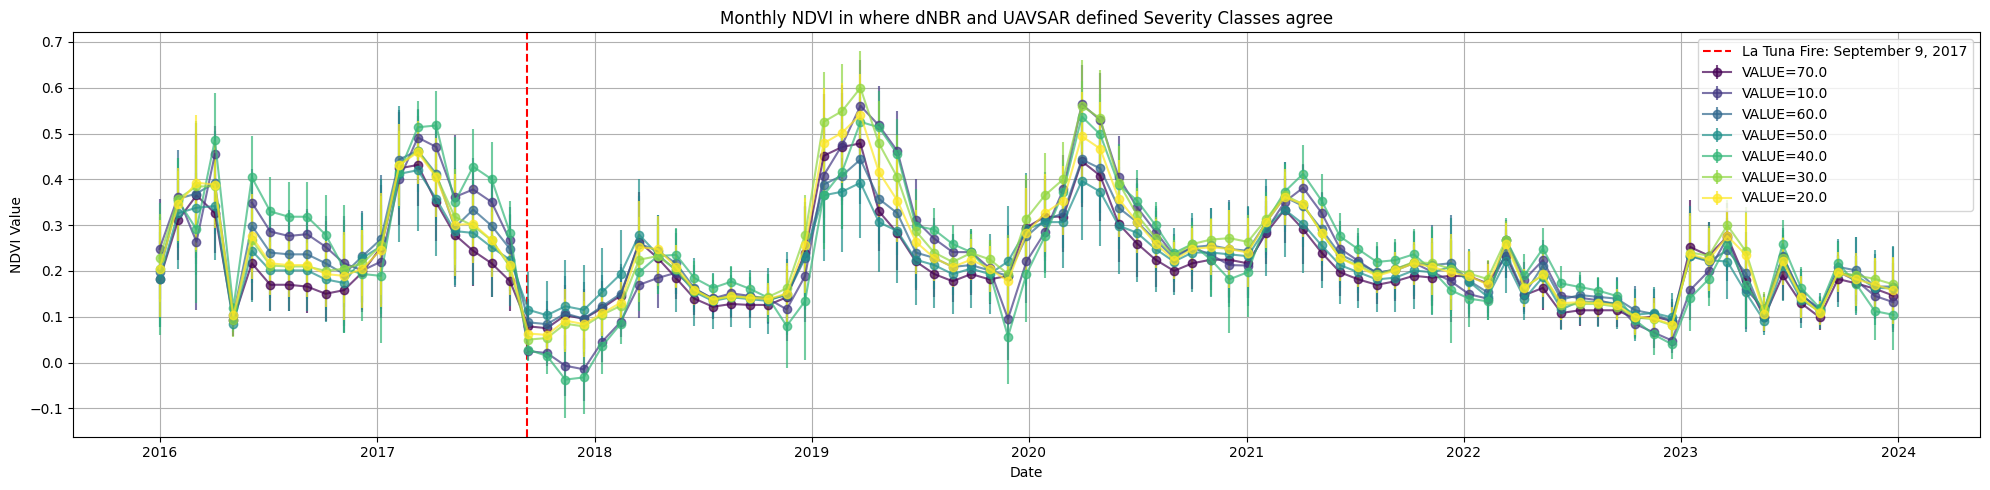

In [11]:
#@title Monthly NDVI (UAVSAR & dNBR comparison classes)

df = dnbr_uavsar_agree_df
df['date'] = pd.to_datetime(df['date'])

# value_labels = {
#     10: 'Low Severity / Unburned',
#     20: 'Medium Severity / Burned',
#     30: 'High Severity'
# }

# df['VALUE'] = df['VALUE'].map(value_labels)

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')

for value, color in zip(unique_values, colors):
    # Select data for the current value
    df_value = df[df['VALUE'] == value]

    # Plot NDVI values with error bars
    plt.errorbar(df_value['date'], df_value['NDVI'], yerr=df_value['STDEV'], fmt='o', linestyle='-', alpha=0.7, color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in where dNBR and UAVSAR defined Severity Classes agree')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-96-63c9f5dc711a>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



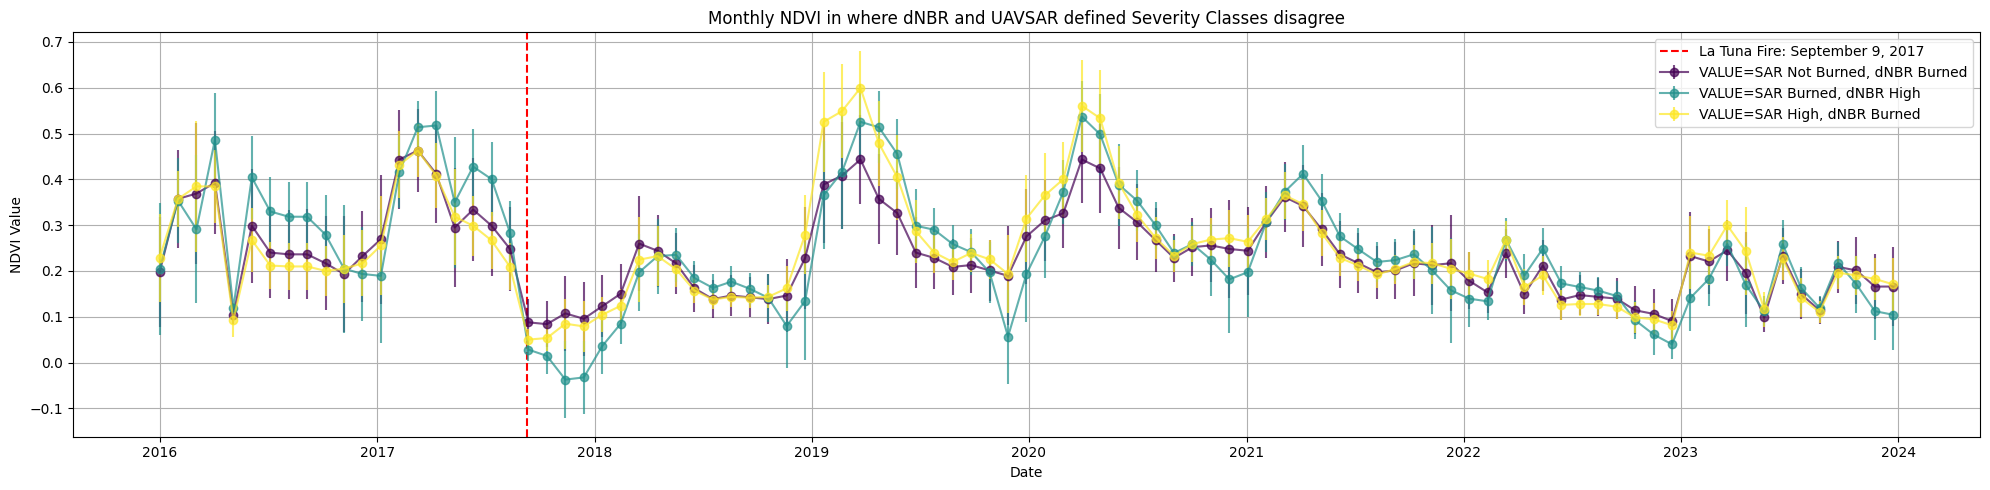

In [96]:
#@title Monthly NDVI (UAVSAR & dNBR disagree classes)

df = dnbr_uavsar_disagree_df
df['date'] = pd.to_datetime(df['date'])

df = df[df['VALUE'] != 10]

value_labels = {
    #10: 'High Agree',
    60: 'SAR Not Burned, dNBR Burned',
    40: 'SAR Burned, dNBR High',
    30: 'SAR High, dNBR Burned'
}

df['VALUE'] = df['VALUE'].map(value_labels)

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')

for value, color in zip(unique_values, colors):
    # Select data for the current value
    df_value = df[df['VALUE'] == value]

    # Plot NDVI values with error bars
    plt.errorbar(df_value['date'], df_value['NDVI'], yerr=df_value['STDEV'], fmt='o', linestyle='-', alpha=0.7, color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in where dNBR and UAVSAR defined Severity Classes disagree')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

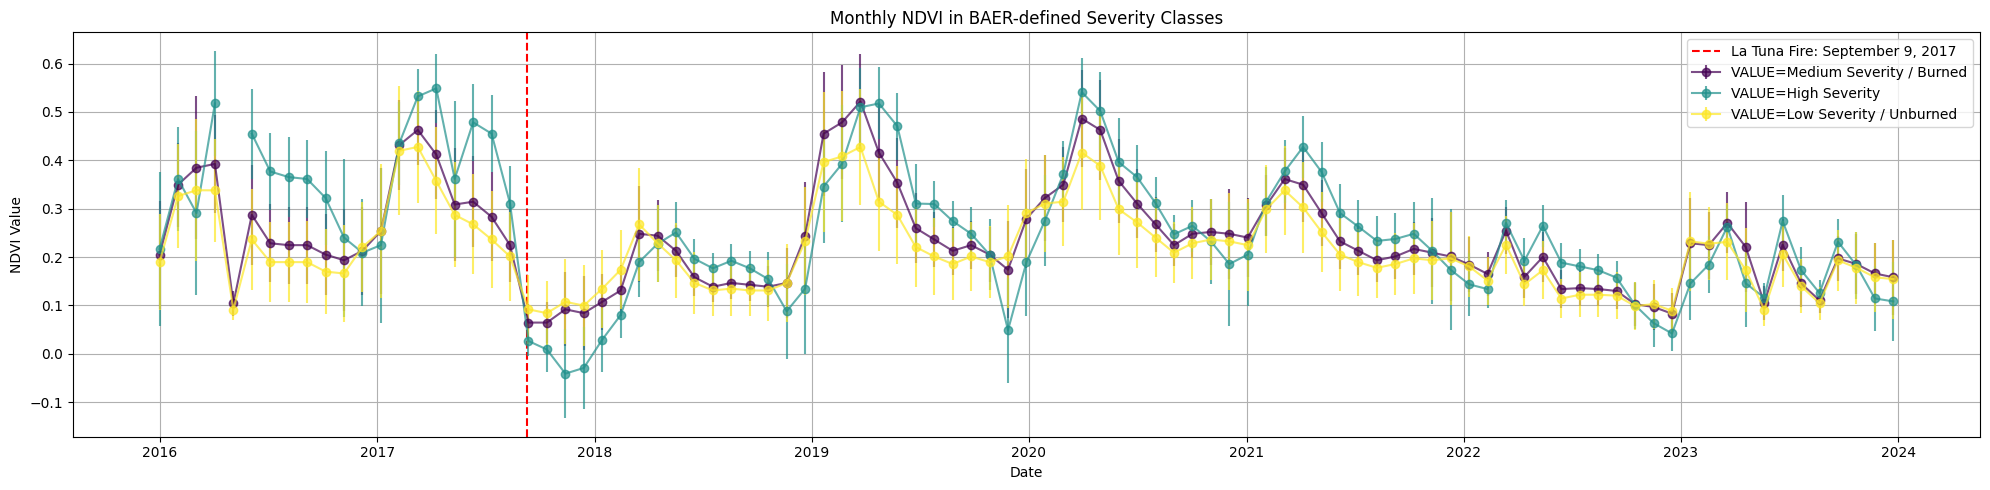

In [49]:
#@title Monthly NDVI (BARC-defined Severity Classes)

df = baer_df
df['date'] = pd.to_datetime(df['date'])

value_labels = {
    2: 'Low Severity / Unburned',
    3: 'Medium Severity / Burned',
    4: 'High Severity'
}

df['VALUE'] = df['VALUE'].map(value_labels)

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')

for value, color in zip(unique_values, colors):
    # Select data for the current value
    df_value = df[df['VALUE'] == value]

    # Plot NDVI values with error bars
    plt.errorbar(df_value['date'], df_value['NDVI'], yerr=df_value['STDEV'], fmt='o', linestyle='-', alpha=0.7, color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in BAER-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

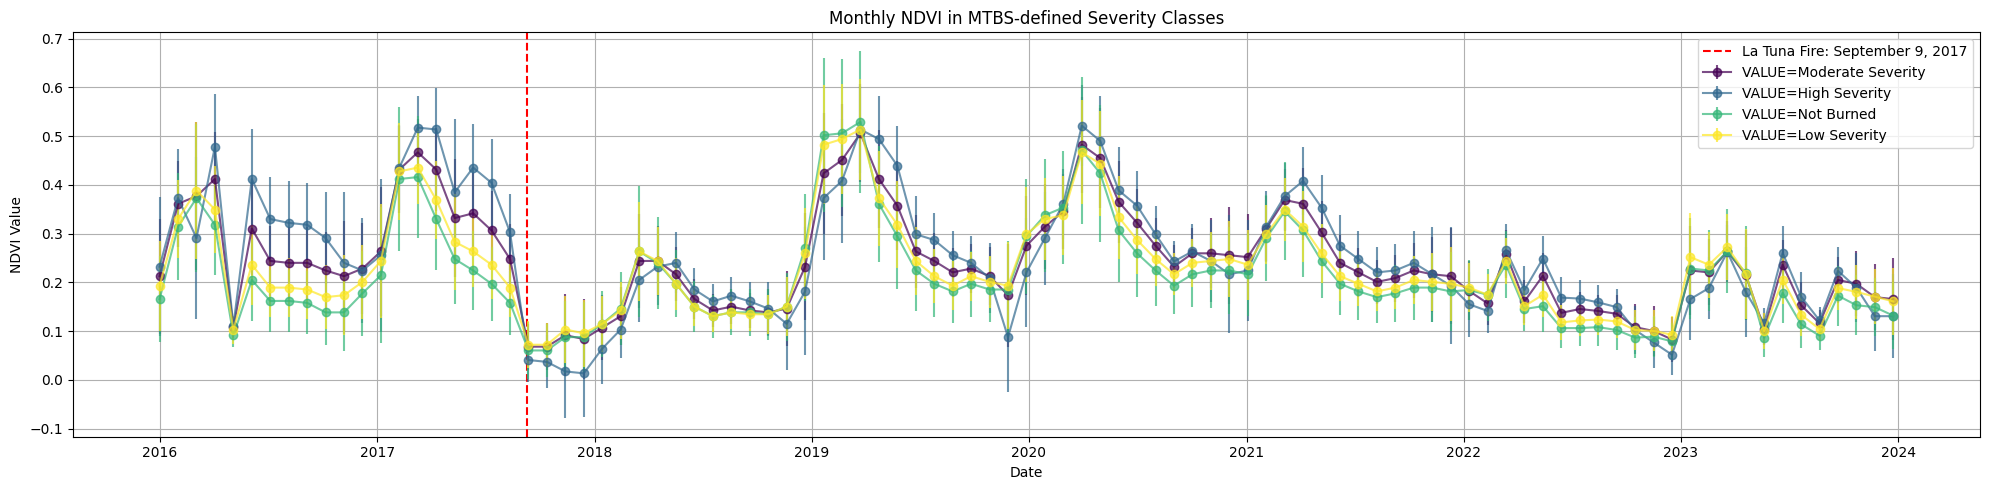

In [14]:
#@title Monthly NDVI (MTBS-defined Severity Classes)

df = mtbs_df
df['date'] = pd.to_datetime(df['date'])

value_labels = {
    1: 'Not Burned',
    2: 'Low Severity',
    3: 'Moderate Severity',
    4: 'High Severity'
}

df['VALUE'] = df['VALUE'].map(value_labels)

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(20, 5))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')

for value, color in zip(unique_values, colors):
    # Select data for the current value
    df_value = df[df['VALUE'] == value]

    # Plot NDVI values with error bars
    plt.errorbar(df_value['date'], df_value['NDVI'], yerr=df_value['STDEV'], fmt='o', linestyle='-', alpha=0.7, color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in MTBS-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Landsat Time Series